# Harry Potter Movie Success Analysis - Paper

In the following we will describe the process of our project, verify our analysis, explain our code and present the reader with our results.

### Considerations and Assumptions

- We assumed that the View Count on Youtube is an indicator for the overall popularity and awareness of the Harry Potter Saga
- Our indicators for Success stem from Box Office Sales, Video Sales and total Book Copies Sold

### Data and Limitations

- Growth in Youtube View Counts can be affected by the increase in Youtube Users
- Many more products in the HP Theme were sold that could indicate further growth
- Youtube data is diverse, unspecific and flawed but allows to portray an overall trend

First of all we connected to the Youtube API pulling all the information regarding View Counts of Videos related to "Harry Potter" in general on one side and those related to "Harry Potter Trailer" on the other hand.

### Youtube API:
#### The Code:

In [1]:
import pandas as pd
import numpy as np

In [ ]:
# If we just use "googleapiclient.discovery" we will have an error.
# We have to use the following line ir order to be able to use the 'build' function.

from googleapiclient.discovery import build

youtube = build('youtube', 'v3', developerKey = api_key )

In [ ]:
# The most important variables. They will define the topic and the time range of the research.
search_topic = ['harry potter trailer', 'harry potter movie trailer',  'harry potter official trailer']
start_year = 2008
end_year = 2013


# This list will store a small DataFrame for each month.
list_df_monthly = []


for each_year in range(start_year, end_year):
    for each_month in range(1,13):
        
        # A il/else loop is created to have a more precisse control of the time range evaluated.
        # December will have an expecific expression to avoid errors. The other months will be the same.
        if each_month == 12:
            start_time = datetime(year=each_year, month= each_month, day=1).strftime('%Y-%m-%dT%H:%M:%SZ')
            end_time = datetime(year= each_year, month= each_month, day=31).strftime('%Y-%m-%dT%H:%M:%SZ')
        else:
            start_time = datetime(year=each_year, month= each_month, day=1).strftime('%Y-%m-%dT%H:%M:%SZ')
            end_time = datetime(year= each_year, month= each_month+1, day=1).strftime('%Y-%m-%dT%H:%M:%SZ')


        res = youtube.search().list(part='snippet', q= search_topic, type='video',
                                    publishedAfter=start_time,
                                    publishedBefore=end_time,
                                    maxResults=50).execute()
        
        #some empty lists are declared. They will store the data.
        video_info = []
        id_list = []
        stats = []
        video_statistics=[]


        for item in sorted(res['items'], key=lambda x:x['snippet']['publishedAt']):
            #print(item['snippet']['title'], item['snippet']['publishedAt'], item['id']['videoId'])

            #from here we take the snippet, which has the video name
            video_info.append(item['snippet'])

            #with this we take the video ID, which will be use as input 
            id_list.append(item['id']['videoId'])


        #this take all the videos_id and analize them 
        res_video = youtube.videos().list(id=','.join(id_list),part='statistics').execute()

        #now we add all of them in a single code line to the variable 'stats'
        stats.append(res_video)

        #this will iterate throught all the videos stats and it will pick the statisctics
        for elem in stats[0]['items']:
            #print(elem['statistics'])
            video_statistics.append(elem['statistics'])   


        #the 2 data sets are created:
        df_videos = pd.DataFrame(stats[0]['items'])
        df_statistics = pd.DataFrame(video_statistics)

        #lets concatenate. super - mega - definitive data set:
        data_frames = [df_videos, df_statistics]
        data = pd.concat(data_frames, axis = 1)

        #some columns are eliminated
        data = data.drop(['kind','etag', 'statistics', 'favoriteCount'], axis=1)

        #df_info    
        df_info = pd.DataFrame(video_info)
        df_info_clean = df_info.drop(['channelId', 'description', 'thumbnails', 'liveBroadcastContent'], axis=1)

        #the last concat is done. this gives a very clean df
        youtube_data = pd.concat([data, df_info_clean], axis = 1)

        #this appends this iteration to the big list
        list_df_monthly.append(youtube_data)
        
        #lets save each month as an independent .csv file.
        if each_month < 10:
            file_name = 'df_youtube_' + search_topic[0] + '_' + str(each_year) + '_0' + str(each_month)+'.csv'
        else:
            file_name = 'df_youtube_' + search_topic[0] + '_' + str(each_year) + '-' + str(each_month)+'.csv'
        
        youtube_data.to_csv(file_name)
    
youtube_df = pd.concat(list_df_monthly)

#show this big data set
youtube_df

#save this big set
big_df_name = 'df_youtube_' + search_topic[0] + '_' + str(start_year) + '-' + str(end_year)+'.csv'
youtube_df.to_csv(big_df_name)

This Code was used to search for the view counts of videos generally related to the key words "Harry Potter" and on the other side for the view counts related to the key words "harry potter trailer"

#### The general Harry Potter Viewcounts on the top 50 most relavent videos per month from 2008 until 2013:

In [4]:
harry_potter_videos = pd.read_csv(r'Miguel-work/df_harry_potter_2008-2013/df_youtube_harry potter_2008-2013.csv')
harry_potter_videos.head()

Unnamed: 0           id  viewCount  likeCount  dislikeCount  commentCount  \
0           0  jpyt0SgYRuU     9303.0       27.0           1.0           6.0   
1           1  EpQ94lVCQ0k    13526.0      100.0           3.0          66.0   
2           2  DHtqry_1vDA     6176.0       71.0           1.0          10.0   
3           3  zhWoqobDZXQ   207534.0      296.0          17.0          58.0   
4           4  6rjjArvzXuc   748233.0     1528.0          61.0         323.0   

                publishedAt                                          title  \
0  2008-01-02T11:48:48.000Z         Harry Potter - The Phelps Twins Clip 5   
1  2008-01-02T23:36:59.000Z                           Harry Potter - Stand   
2  2008-01-03T04:17:36.000Z  In Exchange for Your Tomorrows | Harry Potter   
3  2008-01-03T11:29:37.000Z                    Harry Potter (Diagon Alley)   
4  2008-01-03T12:05:22.000Z                      Harry Potter (Dobby free)   

    channelTitle publishTime  
0  VisionFilmsTV         NaN  
1      Accio HHr         NaN  
2            lim         NaN  
3      ginny1025         NaN  
4      ginny1025         NaN

See below the results illustrated over time:

#### The Harry Potter Trailer Viewcounts on the top 50 most relavent videos per month from 2008 until 2013:


In [5]:
harry_potter_trailers = pd.read_csv(r'Miguel-work/df_harry_potter_trailer_2008-2013/df_youtube_harry potter trailer_2008-2013.csv')
harry_potter_trailers.head()

Unnamed: 0           id  viewCount  likeCount  dislikeCount  commentCount  \
0           0  71K8yDAgogI    92152.0       77.0           4.0          14.0   
1           1  13zLoj2J5no     1278.0        9.0           2.0           3.0   
2           2  g07HXQCBGB8     4655.0       49.0           3.0           4.0   
3           3  BCv0sjcxSOQ    40525.0      162.0          16.0          73.0   
4           4  PtkrwQCq_iw   232688.0      770.0         220.0         173.0   

                publishedAt  \
0  2008-01-01T15:25:22.000Z   
1  2008-01-01T19:05:50.000Z   
2  2008-01-02T03:56:04.000Z   
3  2008-01-02T11:56:08.000Z   
4  2008-01-02T18:29:27.000Z   

                                               title          channelTitle  \
0  Trailer de Video Game - HP e a Câmara Secreta ...  GabrielRabichoPotter   
1                    Harry Potter 5 Fan Made Trailer            xXevelOnXx   
2  Harry &amp; Hermione &quot;Friends &amp; Lover...         michelle26123   
3             Harry Potter - Hermione Punches Malfoy              mumbo666   
4              L&#39;histoire de Bellatrix Lestrange             Shendra19   

  publishTime  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

See below the results illustrated over time:

In addition to this we scraped Numbers.com to create a dataframe with the Sales information of the Movies and Books

Below see the code used for scraping:

In [ ]:
url = 'https://www.the-numbers.com/movies/franchise/Harry-Potter#tab=summary'
page = requests.get(url).content
page_soup = BeautifulSoup(page, 'html.parser')
numbers_summary = page_soup.find('table',{'id':'franchise_movies_overview'})
table_rows= numbers_summary.select('table tbody tr')

release_date = []
for elem in table_rows: # we expect all rows
    release_date.append(elem.find_all('td')[0].getText())

print(release_date)

This was iterated until the dataframe was complete. 

In [7]:
movies_books_numbers = pd.read_csv(r"Vicky's work/data_output/movie_book_sales.csv")
movies_books_numbers

Unnamed: 0 Release_Date                                     Title  \
0           4      2011-07   Harry Potter and the Deathly Hollows II   
1           5      2010-11    Harry Potter and the Deathly Hollows I   
2           6      2009-07    Harry Potter and the Half-Blood Prince   
3           7      2007-07     Harry Potter and the Order of Phoenix   
4           8      2005-11       Harry Potter and the Goblet of Fire   
5           9      2004-06  Harry Potter and the Prisoner of Askaban   
6          10      2002-11   Harry Potter and the Chamber of Secrets   
7          11      2001-11      Harry Potter and the Sorcerers Stone   

   Production_Budget  Opening_Weekend  Domestic_Boxoffice_Sales  \
0          125000000        169189427                 381193157   
1          125000000        125017372                 296131568   
2          250000000         77835727                 302089278   
3          150000000         77108414                 292137260   
4          150000000        102685961                 290201752   
5          130000000         93687367                 249757726   
6          100000000         88357488                 262233381   
7          125000000         90294621                 317871467   

   Wordwide_Boxoffice_Sales  Dom_DVD_Sales  Dom_BRAY_Sales  \
0                1341693157      102461187        60066364   
1                 960431568       95762486        61118715   
2                 935213767      148064710        51295786   
3                 943076457      254270750         5206421   
4                 897099794      542640844         6237064   
5                 795616337              0               0   
6                 879225135              0               0   
7                 975047606              0               0   

   Total_Dom_Video_Sales  Copys_Sold_approx Publishing_Date  
0              162527551           65000000         2007-07  
1              156881201           65000000         2007-07  
2              199360496           65000000         2005-07  
3              259477171           65000000         2003-06  
4              548877908           65000000         2000-07  
5                      0           65000000         1999-07  
6                      0           77000000         1998-07  
7                      0          120000000         1997-06

Several illustrations were created with this data:

Box Office Sales on the Opening Weekend

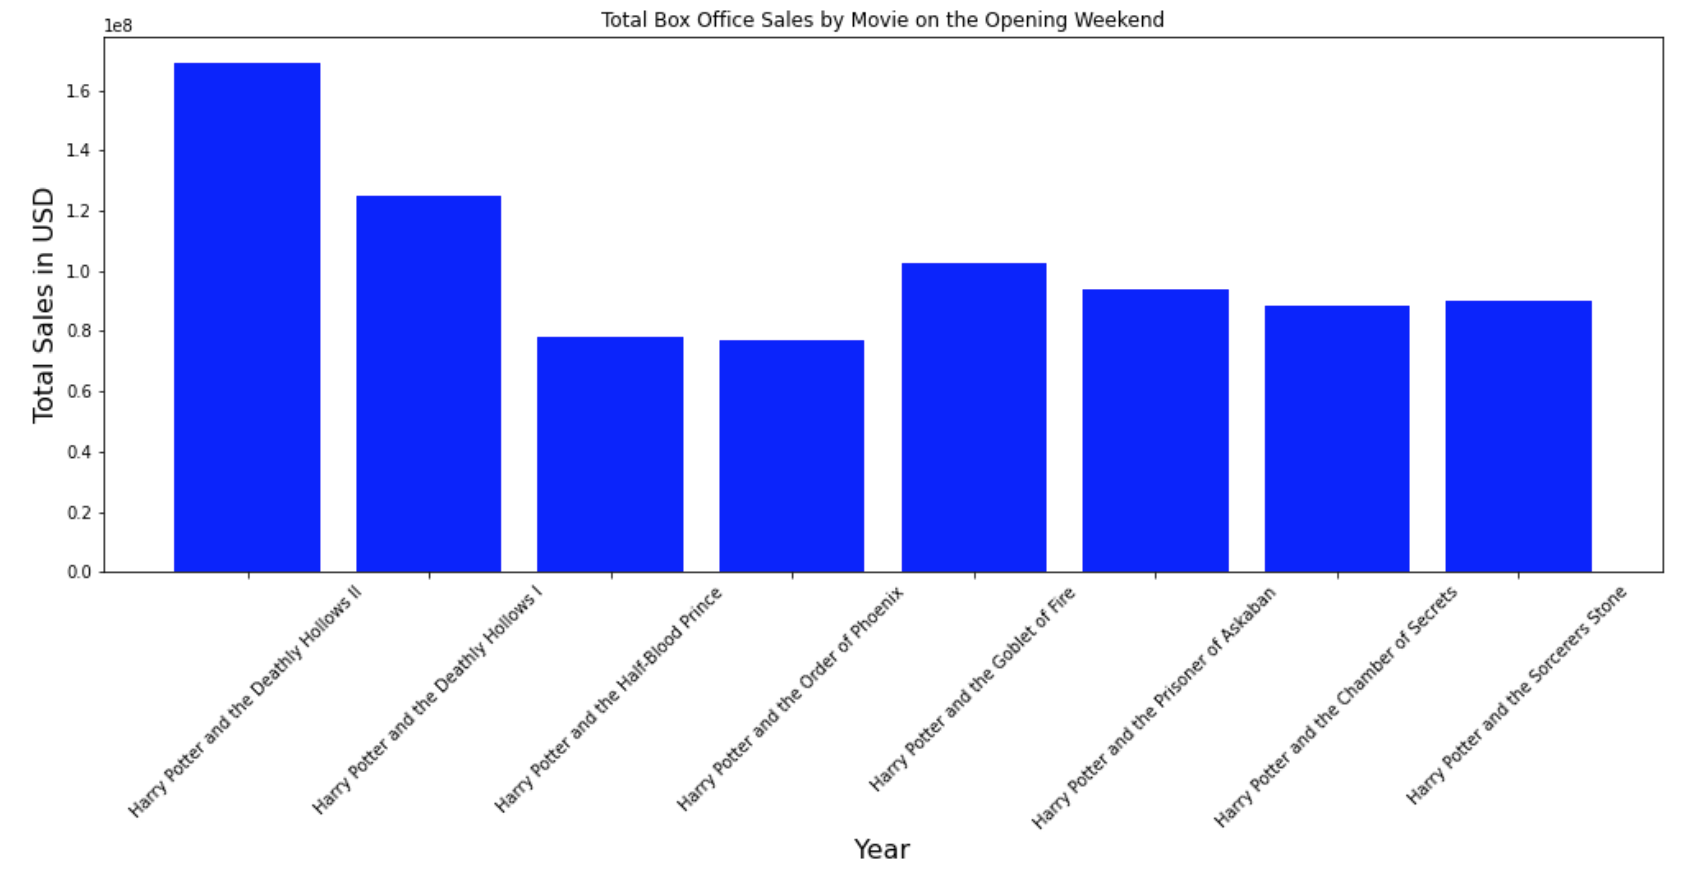

Total Domestic Box Office Sales

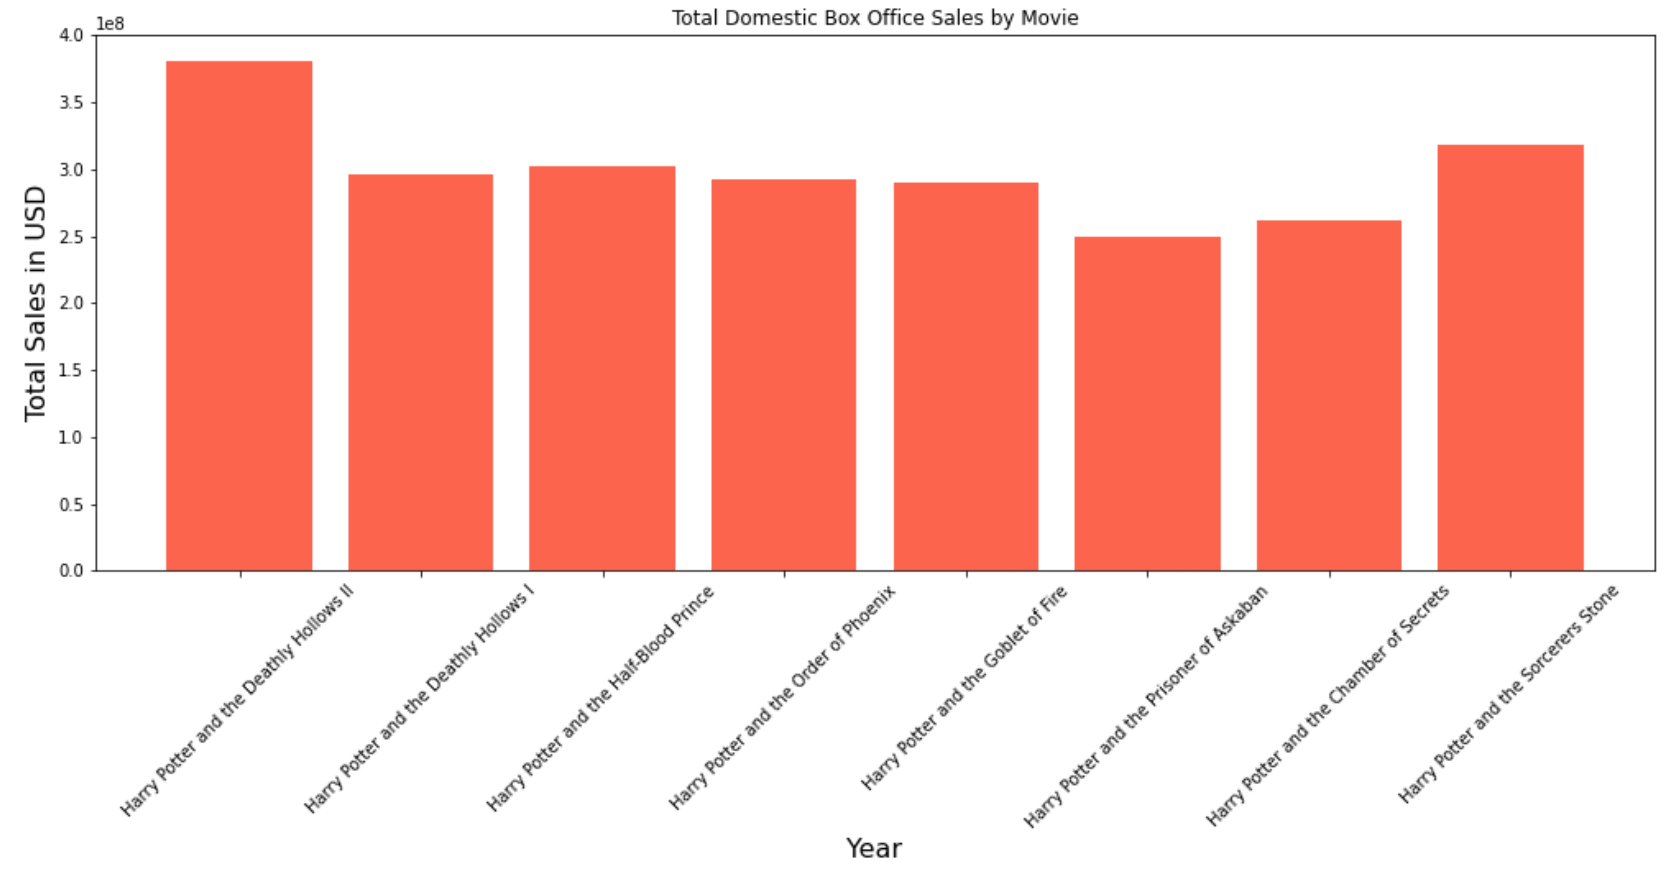

Total Worldwide Box Office Sales

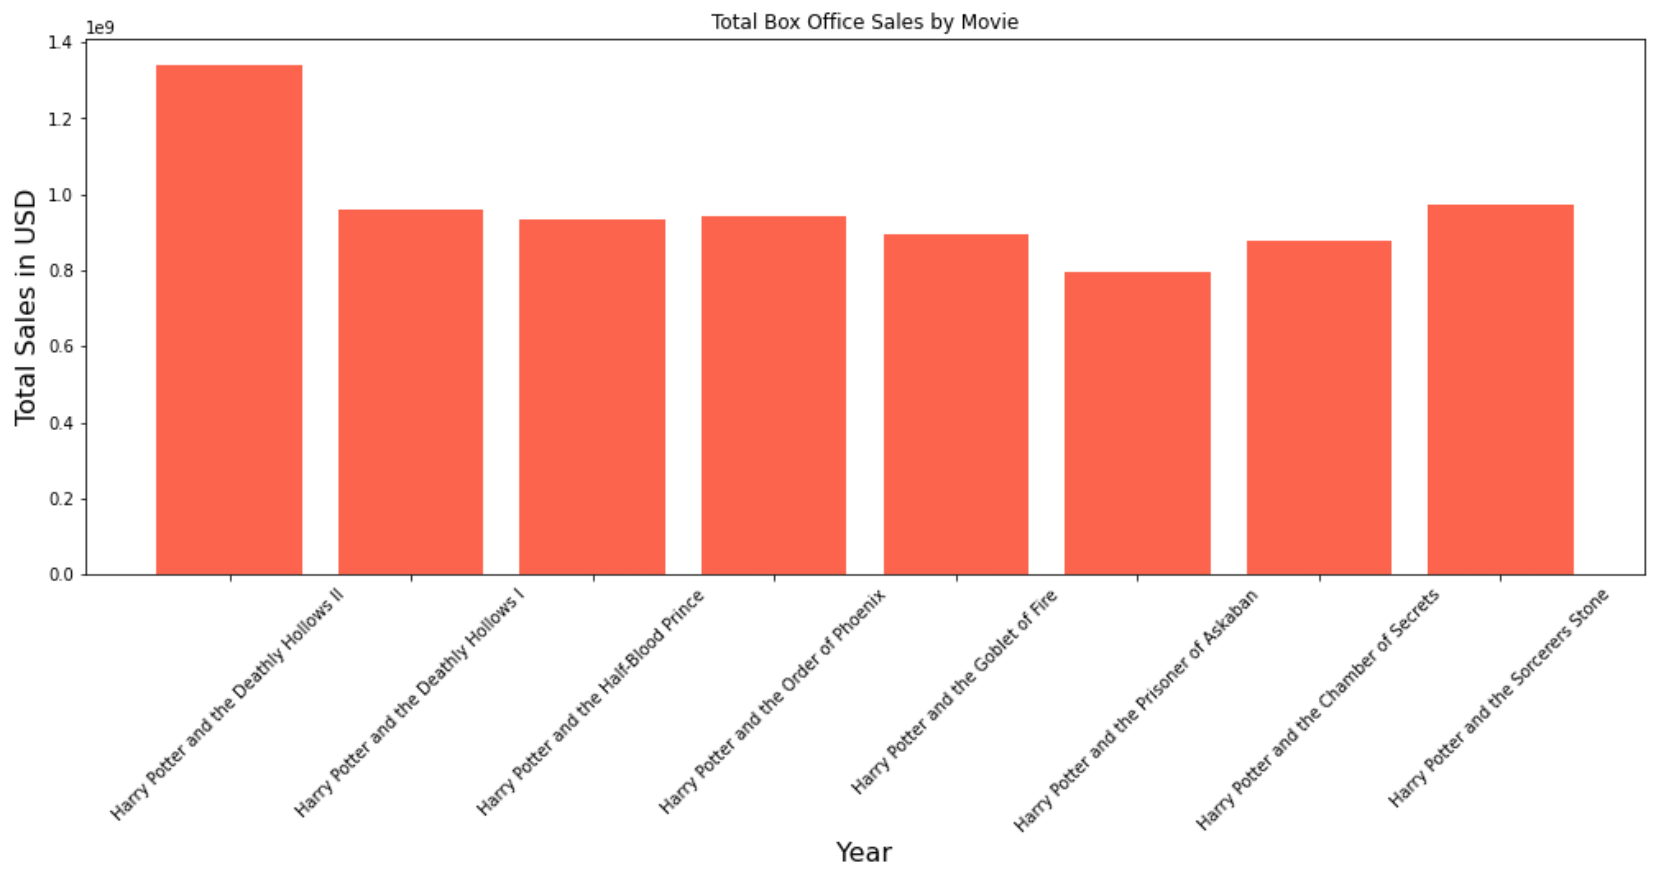

Total Video Sales (including DVD and BlueRay)

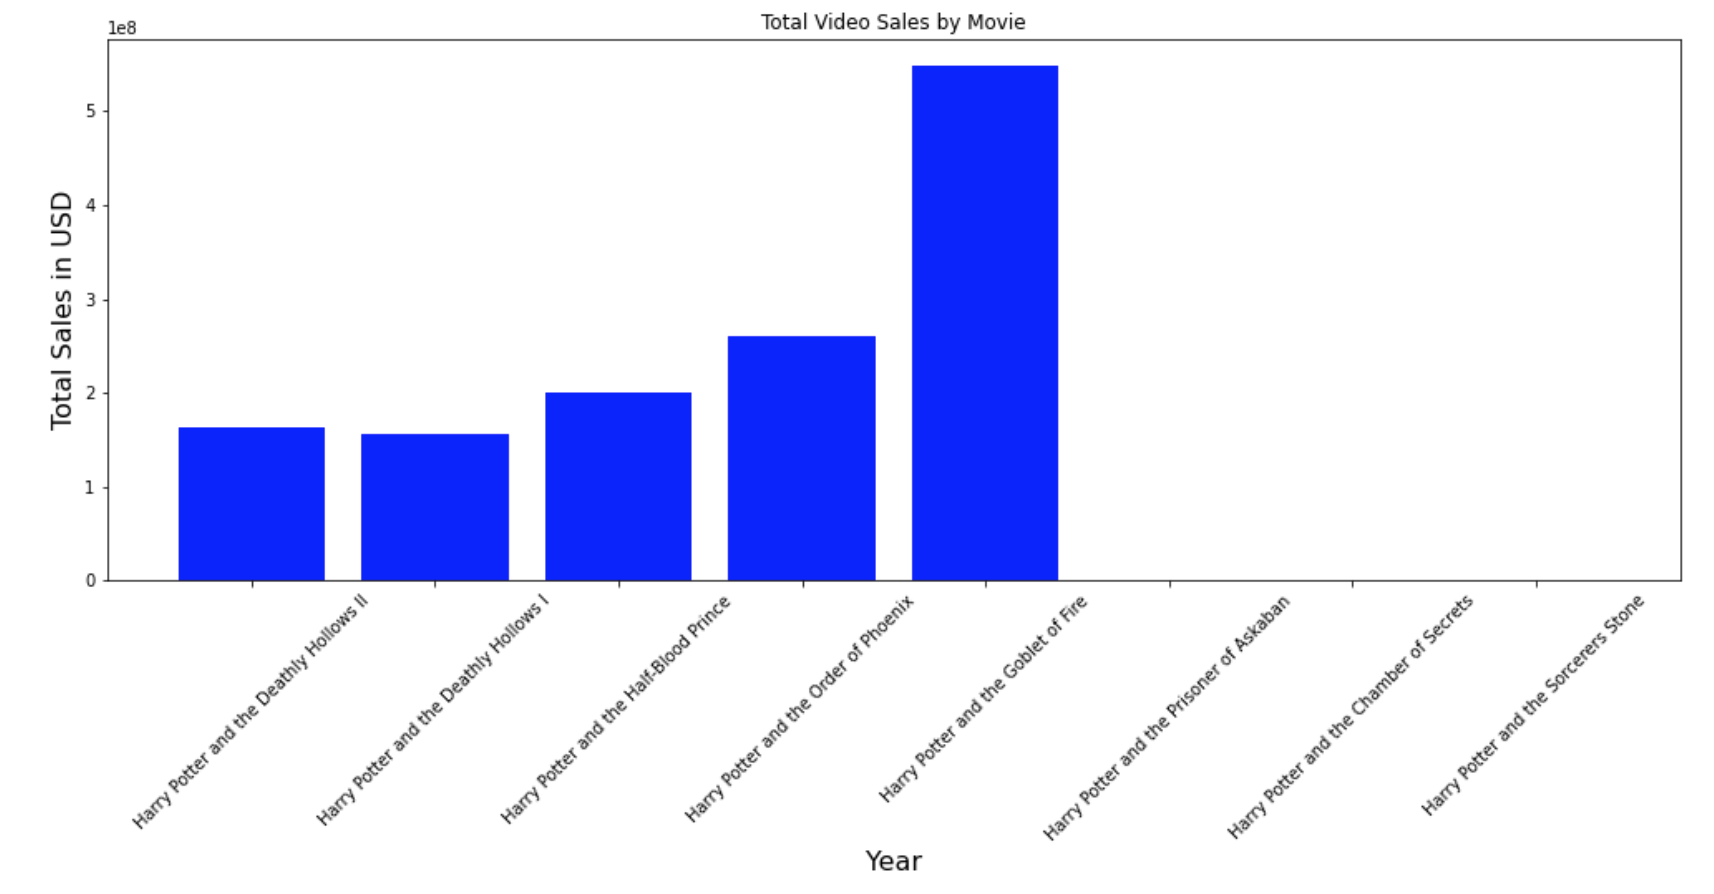

Total Book Copies Sold approximatly

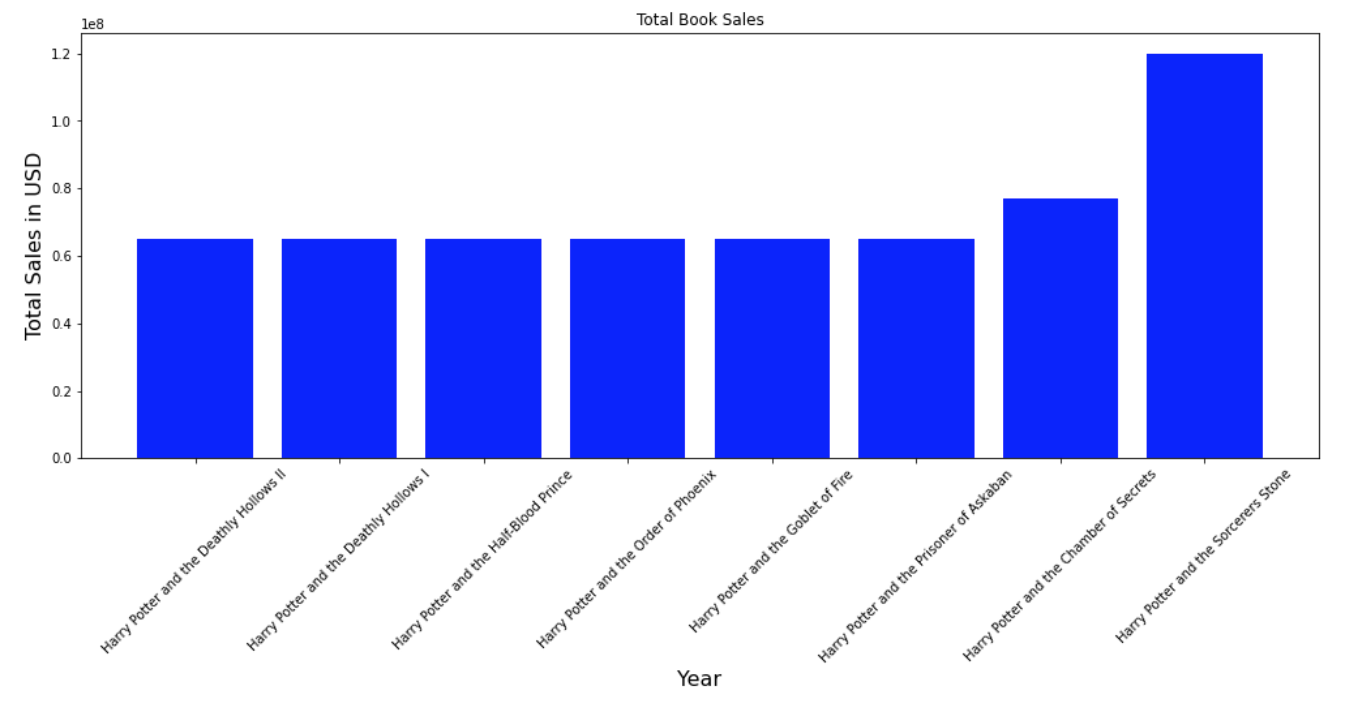

### Finally we merged the data to illustrate the correlation of movie releases with Youtube Views for trailers and Youtube Videos

The merged data frame looked like this:

In [10]:
final_merged_harry_potter = pd.read_csv(r"Miguel-work/final_merged_harrypotter.csv")
final_merged_harry_potter.head()

Unnamed: 0  viewCount        date Title_book  Copies_Sold_approx  \
0           0  199917.80  2008-01-01        NaN                 NaN   
1           1  274452.86  2008-02-01        NaN                 NaN   
2           2  205203.06  2008-03-01        NaN                 NaN   
3           3  403787.16  2008-04-01        NaN                 NaN   
4           4  701851.44  2008-05-01        NaN                 NaN   

  Title_movies  Production_Budget  Opening_Weekend  Domestic_Boxoffice_Sales  \
0          NaN                NaN              NaN                       NaN   
1          NaN                NaN              NaN                       NaN   
2          NaN                NaN              NaN                       NaN   
3          NaN                NaN              NaN                       NaN   
4          NaN                NaN              NaN                       NaN   

   Wordwide_Boxoffice_Sales  Dom_DVD_Sales  Dom_BRAY_Sales  \
0                       NaN            NaN             NaN   
1                       NaN            NaN             NaN   
2                       NaN            NaN             NaN   
3                       NaN            NaN             NaN   
4                       NaN            NaN             NaN   

   Total_Dom_Video_Sales  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN

When visualized the data looked like this:

In [11]:
final_merged_trailer = pd.read_csv(r"Miguel-work/final_merged_harrypotter_trailer.csv")
final_merged_trailer.head()

Unnamed: 0  viewCount        date Title_book  Copies_Sold_approx  \
0           0  118731.80  2008-01-01        NaN                 NaN   
1           1   81066.50  2008-02-01        NaN                 NaN   
2           2  107177.16  2008-03-01        NaN                 NaN   
3           3   67233.24  2008-04-01        NaN                 NaN   
4           4  662448.92  2008-05-01        NaN                 NaN   

  Title_movies  Production_Budget  Opening_Weekend  Domestic_Boxoffice_Sales  \
0          NaN                NaN              NaN                       NaN   
1          NaN                NaN              NaN                       NaN   
2          NaN                NaN              NaN                       NaN   
3          NaN                NaN              NaN                       NaN   
4          NaN                NaN              NaN                       NaN   

   Wordwide_Boxoffice_Sales  Dom_DVD_Sales  Dom_BRAY_Sales  \
0                       NaN            NaN             NaN   
1                       NaN            NaN             NaN   
2                       NaN            NaN             NaN   
3                       NaN            NaN             NaN   
4                       NaN            NaN             NaN   

   Total_Dom_Video_Sales  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN

### Also we had some fun with some random csv's we found

In [15]:
characters = pd.read_csv(r"Vicky's work/data/Characters.csv", encoding = "ISO-8859-1", sep=';')
characters.head()

Id                                     Name  Gender  \
0   1                       Harry James Potter    Male   
1   2                    Ronald Bilius Weasley    Male   
2   3                    Hermione Jean Granger  Female   
3   4  Albus Percival Wulfric Brian Dumbledore    Male   
4   5                            Rubeus Hagrid    Male   

                                                 Job       House  \
0                                            Student  Gryffindor   
1                                            Student  Gryffindor   
2                                            Student  Gryffindor   
3                                         Headmaster  Gryffindor   
4  Keeper of Keys and Grounds | Professor of Care...  Gryffindor   

                                 Wand              Patronus  \
0         11"  Holly  phoenix feather                  Stag   
1          12" Ash unicorn tail hair   Jack Russell terrier   
2  10¾"  vine wood dragon heartstring                 Otter   
3   15" Elder Thestral tail hair core               Phoenix   
4               16"  Oak unknown core                  None   

                 Species             Blood status              Hair colour  \
0                  Human               Half-blood                    Black   
1                  Human               Pure-blood                      Red   
2                  Human              Muggle-born                    Brown   
3                  Human               Half-blood  Silver| formerly auburn   
4  Half-Human/Half-Giant  Part-Human (Half-giant)                    Black   

     Eye colour                                            Loyalty  \
0  Bright green  Albus Dumbledore | Dumbledore's Army | Order o...   
1          Blue  Dumbledore's Army | Order of the Phoenix | Hog...   
2         Brown  Dumbledore's Army | Order of the Phoenix | Hog...   
3          Blue  Dumbledore's Army | Order of the Phoenix | Hog...   
4         Black  Albus Dumbledore | Order of the Phoenix | Hogw...   

                                              Skills               Birth  \
0  Parseltongue| Defence Against the Dark Arts | ...        31 July 1980   
1               Wizard chess | Quidditch goalkeeping        1 March 1980   
2                                  Almost everything  19 September, 1979   
3  Considered by many to be one of the most power...    Late August 1881   
4  Resistant to stunning spells| above average st...     6 December 1928   

            Death  
0             NaN  
1             NaN  
2             NaN  
3  30 June, 1997   
4             NaN

In [16]:
spells = pd.read_csv(r"Vicky's work/data/Spells.csv", encoding = "ISO-8859-1", sep=';')
spells.head()

Name       Incantation                Type  \
0                    Summoning Charm             Accio               Charm   
1                           Age Line           Unknown               Charm   
2                 Water-Making Spell         Aguamenti  Charm, Conjuration   
3   Launch an object up into the air  Alarte Ascendare               Charm   
4  Albus Dumbledore's Forceful Spell           Unknown               Spell   

                                              Effect     Light  
0                                  Summons an object      None  
1  Prevents people above or below a certain age f...      Blue  
2                                     Conjures water  Icy blue  
3                              Rockets target upward       Red  
4                                        Great Force      None

In [18]:
potions = pd.read_csv(r"Vicky's work/data/Potions.csv", encoding = "ISO-8859-1", sep=';')
potions.head()

Name                                  Known ingredients  \
0            Ageing Potion                             Newt spleens , Bananas   
1               Amortentia                                                NaN   
2  Antidote to Veritaserum                                                NaN   
3        Babbling Beverage                  Valerian sprigs, Aconite, Dittany   
4  Baruffio's Brain Elixir  Leaping Toadstools, Frog Brains, Runespoor egg...   

                                              Effect  \
0                           Ages drinker temporarily   
1  Love Potion that causes a powerful infatuation...   
2                 Counters the effect of Veritaserum   
3               Causes the drinker to speak nonsense   
4              Allegedly increases one's brain power   

                                     Characteristics Difficulty level  
0                                              Green         Advanced  
1  Mother-of-pearl sheen, Spiralling steam, Scent...         Advanced  
2                                                NaN              NaN  
3                                                NaN              NaN  
4                                    Green in colour              NaN

## Our Conclusion

- The most popular movies were Part 1 and the latter Part 7, while the biggest hype was created around the latter part of Part 7
- The popularity of DVD’s/BlueRay Discs has dropped by 70,38 % from the fourth movie to the last
- While all books are among the best selling books in History, the most copies were sold of the first part.
- There was a spike in Harry Potter searches after the last Movie was released - probably because people were coping with the end of an era

### Challenges:

- Finding a concrete Topic & Project Objection
- Understanding the expectations
- Time Management

### Learnings: 

- What kind of information there is
- How to retrieve, structure and analyse data
- How to deal with imperfect data sets

## Our Sources

[Youtube Data API](https://developers.google.com/youtube/v3)

[Numbers.com](https://www.the-numbers.com/movies/franchise/Harry-Potter#tab=summary)

[Wikipedia](https://en.wikipedia.org/wiki/List_of_best-selling_books)

[Kaggle](https://www.kaggle.com/gulsahdemiryurek/harry-potter-dataset) 